In [114]:
import os, sys
import ants
import argparse
import shutil
import logging
import subprocess

In [108]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/')

['dicom',
 '1_z_score_',
 'orig',
 '1_z_score',
 'folders_description.md',
 'meta.csv']

In [235]:
def calculate_z_score(img):
    """ Calculates Z-score normalisation over ants.img and returns new image"""
    
    if type(img) is str:
        # Read images if input is pathlike
        img = ants.image_read(img)
        
    img_z = (img.numpy() - img.numpy().mean())/img.numpy().std()
    new_img = img.new_image_like(img_z)
    return new_img

def rigid_reg(fixed, moving):
    """Rigidly register `moving` image onto `fixed` image and apply resulting transformation on `mask`.
    Returns mask in `fixed` resolution."""
    
    if type(fixed) is str:
        # Read images if input is pathlike
        fixed = ants.image_read(fixed)
        moving = ants.image_read(moving)
    
    # Compute registration if input is ants.image
    res = ants.registration(fixed=fixed, moving=moving,
                            type_of_transform='Rigid')
    
    new_img = ants.apply_transforms(fixed, moving,
                                    transformlist = res['fwdtransforms'][0])
    return new_img

def hdbet_fast(src_path, dst_path):
    command = ["hd-bet", "-i", src_path, "-o", dst_path, "-device", "cpu", "-mode", "fast", "-tta", "0"]
    subprocess.call(command)
    return

def hdbet(src_path, dst_path):
    command = ["hd-bet", "-i", src_path, "-o", dst_path, "-device", "cpu"]
    subprocess.call(command)
    return

In [293]:
from glob import glob
import ants 

output = '/anvar/public_datasets/preproc_study/gbm/1_z_score/'
path = '/anvar/public_datasets/preproc_study/gbm/orig/'
movingfilenames = ['T1.nii.gz', 'FLAIR.nii.gz', 'T2.nii.gz']
fixedfilename = 'CT1.nii.gz'

subjects_paths = [f.path for f in os.scandir(path) if f.is_dir()]
subjects = [f.split('/')[-1] for f in subjects_paths ]

for subject in ['TCGA-06-0646']:
    # Creating folder to save subject data
#     os.makedirs(output + subject + '/', exist_ok=True)
    try:
#         os.makedirs(output + subject + '/')
        img_fixed = glob(path + subject + '/' + fixedfilename)[0]

        for name in movingfilenames:
            img_moving = glob(path + subject + '/' + name)[0]
            # Image registration
            registered_img = rigid_reg(img_fixed, img_moving)
            # Z-score individual calculation
            registered_img_z = calculate_z_score(registered_img)
            ants.image_write(registered_img_z, output + subject + '/' + name , ri=False);

        img_fixed_z = calculate_z_score(img_fixed)
        ants.image_write(img_fixed_z, output + subject + '/' + fixedfilename , ri=False);
    except:
        pass

Exception Object caught: 

itk::ExceptionObject (0x55f1c2940690)
Location: "unknown" 
File: /build100/ANTsPy/itksource/Modules/Core/Common/include/itkImageBase.hxx
Line: 308
Description: itk::ERROR: itk::ERROR: Image(0x55f17f977320): itk::ImageBase::CopyInformation() cannot cast PKN3itk10DataObjectE to PKN3itk9ImageBaseILj4EEE




In [295]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1a.nii.gz')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'CT1_SEG.nii.gz',
 'CT1a.nii.gz',
 'CT1.nii.gz']

In [298]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0355/CT1a.nii.gz')

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (512, 512, 72, 2)
	 Spacing    : (0.4688, 0.4688, 2.5, 3.0542)
	 Origin     : (-119.192, 95.7908, -58.339, 0.0)
	 Direction  : [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [ ]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1a.nii.gz')

In [284]:
fixed = ants.image_read(img_fixed)
moving = ants.image_read(img_moving)
# Compute registration if input is ants.image
res = ants.registration(fixed=fixed, moving=moving,
                            type_of_transform='Rigid')
    
# new_img = ants.apply_transforms(img_fixed, img_moving,
#                                     transformlist = res['fwdtransforms'][0])

Exception Object caught: 

itk::ExceptionObject (0x55f1ac4a0fc0)
Location: "unknown" 
File: /build100/ANTsPy/itksource/Modules/Core/Common/include/itkImageBase.hxx
Line: 308
Description: itk::ERROR: itk::ERROR: Image(0x55f1ac49f640): itk::ImageBase::CopyInformation() cannot cast PKN3itk10DataObjectE to PKN3itk9ImageBaseILj4EEE




In [291]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/CT1_SEG.nii.gz'))

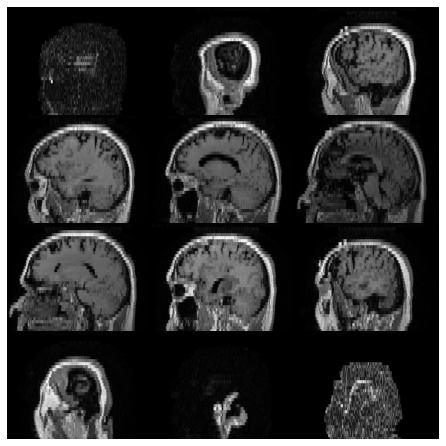

In [286]:
ants.plot(img_moving)

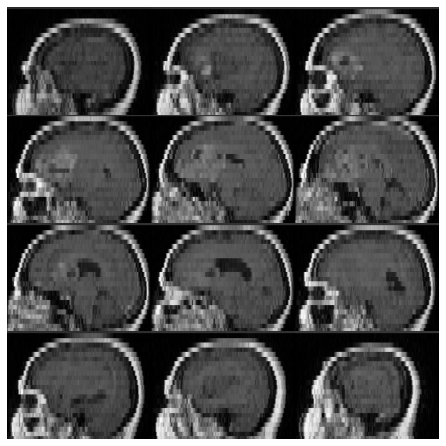

In [57]:
ants.plot(image_t1c_z)

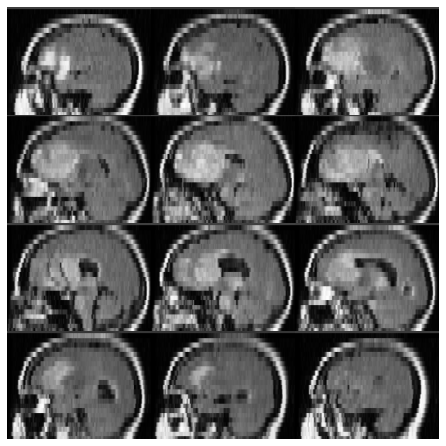

In [55]:
ants.plot(image_flair_z)

## Copy `seg` files:

In [109]:
basedir = '/anvar/public_datasets/preproc_study/gbm/orig/'

In [113]:
 os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/TCGA-02-0086')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

In [248]:
import shutil
# no acess to read-only folder
for i in os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/'):
#     print(len(os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + i )))
#     shutil.copy(basedir + i + '/CT1_SEG.nii.gz', '/anvar/public_datasets/preproc_study/gbm/1_z_score/' + i + '/CT1_SEG.nii.gz',)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
5
5
5
5


In [244]:
import shlex, time 
base_command = """sudo cp /anvar/public_datasets/preproc_study/gbm/orig/{subject}/CT1_SEG.nii.gz /anvar/public_datasets/preproc_study/gbm/1_z_score/{subject}/CT1_SEG.nii.gz"""
for patient in os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/'):
    print(patient)
    command_to_run = base_command.format(subject = patient)
    command_to_run = shlex.split(command_to_run)
    process = subprocess.Popen(command_to_run,shell=False)
    time.sleep(1)

TCGA-02-0086


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558265 is still running



TCGA-02-0102


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558271 is still running



TCGA-02-0059


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558273 is still running



TCGA-02-0069


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558275 is still running



TCGA-19-2624


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558277 is still running



TCGA-06-0182


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558279 is still running



TCGA-08-0360


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558281 is still running



TCGA-02-0006


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558283 is still running



TCGA-19-2631


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558285 is still running



TCGA-12-1094


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558287 is still running



TCGA-06-2570


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558289 is still running



TCGA-06-0119


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558291 is still running



TCGA-06-0145


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558293 is still running



TCGA-08-0509


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558295 is still running



TCGA-06-5408


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558297 is still running



TCGA-02-0116


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558299 is still running



TCGA-06-0188


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558301 is still running



TCGA-76-6661


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558303 is still running



TCGA-02-0047


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558305 is still running



TCGA-12-3650


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558307 is still running



TCGA-02-0064


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558309 is still running



TCGA-14-1825


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558311 is still running



TCGA-06-0162


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558313 is still running



TCGA-02-0033


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558315 is still running



TCGA-08-0359


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558317 is still running



TCGA-02-0054


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558319 is still running



TCGA-06-0184


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558321 is still running



TCGA-12-1601


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558323 is still running



TCGA-06-5413


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558325 is still running



TCGA-76-6191


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558327 is still running



TCGA-02-0075


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558329 is still running



TCGA-06-0177


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558331 is still running



TCGA-06-0154


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558333 is still running



TCGA-06-0179


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558335 is still running



TCGA-19-5951


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558337 is still running



TCGA-12-1598


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558339 is still running



TCGA-12-0616


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558341 is still running



TCGA-02-0070


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558343 is still running



TCGA-06-1084


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558345 is still running



TCGA-12-0829


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558347 is still running



TCGA-76-4932


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558349 is still running



TCGA-02-0068


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558351 is still running



TCGA-76-6282


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558353 is still running



TCGA-08-0385


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558355 is still running



TCGA-12-1098


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558357 is still running



TCGA-08-0512


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558359 is still running



TCGA-08-0389


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558361 is still running



TCGA-14-1794


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558363 is still running



TCGA-19-1789


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558369 is still running



TCGA-02-0009


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558372 is still running



TCGA-06-0122


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558375 is still running



TCGA-08-0355


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558378 is still running



TCGA-06-6389


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558381 is still running



TCGA-06-0190


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558384 is still running



TCGA-06-0192


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558387 is still running



TCGA-02-0027


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558390 is still running



TCGA-06-0137


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558392 is still running



TCGA-12-0776


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558394 is still running



TCGA-76-6657


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558396 is still running



TCGA-06-0176


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558398 is still running



TCGA-08-0356


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558400 is still running



TCGA-76-6662


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558402 is still running



TCGA-08-0522


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558404 is still running



TCGA-06-1802


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558406 is still running



TCGA-19-5960


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558408 is still running



TCGA-08-0390


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558410 is still running



TCGA-14-1456


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558412 is still running



TCGA-06-0158


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558414 is still running



TCGA-06-0139


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558416 is still running



TCGA-06-0238


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558418 is still running



TCGA-76-4935


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558420 is still running



TCGA-14-3477


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558422 is still running



TCGA-02-0106


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558424 is still running



TCGA-06-0644


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558426 is still running



TCGA-19-0963


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558428 is still running



TCGA-06-0187


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558430 is still running



TCGA-76-6664


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558432 is still running



TCGA-76-6663


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558434 is still running



TCGA-76-6285


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558436 is still running



TCGA-76-4934


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558438 is still running



TCGA-02-0087


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558440 is still running



TCGA-08-0392


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558442 is still running



TCGA-02-0085


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558444 is still running



TCGA-06-0185


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558446 is still running



TCGA-06-0130


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558448 is still running



TCGA-06-0240


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558450 is still running



TCGA-02-0034


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558452 is still running



TCGA-06-0149


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558454 is still running



TCGA-02-0011


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558456 is still running



TCGA-06-0138


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558458 is still running



TCGA-76-6280


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558460 is still running



TCGA-19-5954


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558462 is still running



TCGA-76-6193


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558464 is still running



TCGA-06-0164


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558468 is still running



TCGA-06-5417


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558470 is still running



TCGA-19-5958


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558472 is still running



TCGA-76-6656


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558475 is still running



TCGA-06-0646


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558477 is still running



TCGA-02-0046


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558479 is still running



TCGA-06-0142


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558481 is still running



TCGA-02-0037


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558483 is still running



TCGA-08-0520


/home/kate/miniconda3/lib/python3.9/subprocess.py:1048: ResourceWarning:

subprocess 3558485 is still running



## Read files

In [241]:
output = '/anvar/public_datasets/preproc_study/gbm/1_z_score/'
(os.listdir(output))

['TCGA-02-0086',
 'TCGA-02-0102',
 'TCGA-02-0059',
 'TCGA-02-0069',
 'TCGA-19-2624',
 'TCGA-06-0182',
 'TCGA-08-0360',
 'TCGA-02-0006',
 'TCGA-19-2631',
 'TCGA-12-1094',
 'TCGA-06-2570',
 'TCGA-06-0119',
 'TCGA-06-0145',
 'TCGA-08-0509',
 'TCGA-06-5408',
 'TCGA-02-0116',
 'TCGA-06-0188',
 'TCGA-76-6661',
 'TCGA-02-0047',
 'TCGA-12-3650',
 'TCGA-02-0064',
 'TCGA-14-1825',
 'TCGA-06-0162',
 'TCGA-02-0033',
 'TCGA-08-0359',
 'TCGA-02-0054',
 'TCGA-06-0184',
 'TCGA-12-1601',
 'TCGA-06-5413',
 'TCGA-76-6191',
 'TCGA-02-0075',
 'TCGA-06-0177',
 'TCGA-06-0154',
 'TCGA-06-0179',
 'TCGA-19-5951',
 'TCGA-12-1598',
 'TCGA-12-0616',
 'TCGA-02-0070',
 'TCGA-06-1084',
 'TCGA-12-0829',
 'TCGA-76-4932',
 'TCGA-02-0068',
 'TCGA-76-6282',
 'TCGA-08-0385',
 'TCGA-12-1098',
 'TCGA-08-0512',
 'TCGA-08-0389',
 'TCGA-14-1794',
 'TCGA-19-1789',
 'TCGA-02-0009',
 'TCGA-06-0122',
 'TCGA-08-0355',
 'TCGA-06-6389',
 'TCGA-06-0190',
 'TCGA-06-0192',
 'TCGA-02-0027',
 'TCGA-06-0137',
 'TCGA-12-0776',
 'TCGA-76-6657

In [230]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/1_z_score/TCGA-02-0086')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

In [227]:
ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + 'TCGA-12-1094/CT1.nii.gz')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 22)
	 Spacing    : (0.9375, 0.9375, 6.5)
	 Origin     : (-120.0, 134.2624, -59.2019)
	 Direction  : [ 1.e+00  0.e+00  0.e+00  0.e+00 -1.e+00 -8.e-04  0.e+00 -8.e-04  1.e+00]

In [206]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-1802')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

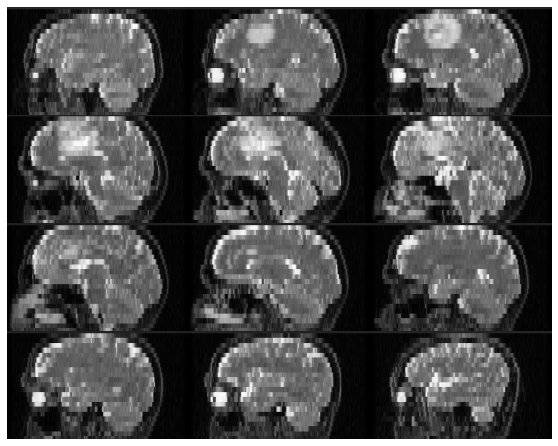

In [222]:
ants.plot('/anvar/public_datasets/preproc_study/gbm/1_z_score/' + 'TCGA-12-1094/T2.nii.gz')

In [264]:
def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/1_z_score_gbm/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

In [265]:
output = '/anvar/public_datasets/preproc_study/gbm/1_z_score/'
import tqdm
import matplotlib.pyplot as plt 
for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/CT1.nii.gz')
        mask = ants.image_read(output + patient +'/CT1_SEG.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

 94%|█████████▍| 97/103 [05:25<00:20,  3.37s/it]

File /anvar/public_datasets/preproc_study/gbm/1_z_score/TCGA-06-0646/CT1.nii.gz does not exist! TCGA-06-0646


 96%|█████████▌| 99/103 [05:28<00:10,  2.67s/it]

File /anvar/public_datasets/preproc_study/gbm/1_z_score/logging.txt/CT1.nii.gz does not exist! logging.txt


100%|██████████| 103/103 [05:34<00:00,  3.25s/it]


In [269]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0646/')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']